Author: Anjani K Shiwakoti
    
Date: June 12, 2019

### Experiment Analysis of an Advertising Campaign (A/B Testing)

#### Context

##### A typical advertising company provides a platform where businesses can create advertising campaigns to increase awareness of their brands or to increase adoption of their products or services. For this exercise, imagine we have a single ad product where advertisers pay us each each time a user clicks on their ad.

##### Each campaign has a budget (how much money the advertiser is willing to spend during a period of time). An advertiser never has to pay more than their budget, so if we were to spend more than the campaign’s budget, we would not be able to bill the advertiser for the additional spend. This is called overspending. In practice it’s difficult to avoid overspending because there is a delay between when we send ads to users and when they actually click on those ads. Since the ad company only charges advertisers for actual clicks on their ads, the charges can enter into the system after some (random) delay. For example, suppose a campaign has 10 dollars of budget remaining and the ad serving systems serves out 1000 ads, expecting 10 of them to generate a click resulting in 1 dollar of revenue each. If, however, 20 ads end up generating clicks, we would receive 20 dollars worth of events and not be able to bill the advertiser for 10 dollars of that. Ultimately, this implies the ad company has “wasted”  10 dollars worth of ad placements (say, 500, in this example) and therefore has incurred an cost.

##### Suppose that lately, we have been noticing an increase in overspend on the platform. In an attempt to reduce the amount of overspend, we decided to create a new product where advertisers pay each time their ad appears in a user’s viewport rather than each time it is clickedon -- presumably these engagements would be received at a lower latency. In order to test the new product, we ran an A/B test. We randomly split the advertisers on the platform. Half of the advertisers remained on the old product and half received the new product. A week later we have some data and want to determine whether or not the experiment was a success.

##### Data Schema:
##### Use columns in data source CSV file.

##### [graphic/spreadsheet] - (redacted)

### Questions:
##### There’s no specific structure or style that we expect from either output other than following yourusual best practices. Please ensure that any figures or tables you include are clearly labelled and all relevant constituent components are legible. The audience for your report is product manager who is familiar with data science and experimentation practices.

##### 1. How many campaigns have overspend of greater than 1 percent of their budget in the control group? In the treatment group?

##### 2. An executive is asking whether or not the new product was effective at reducing overspend, and whether or not it is more or less effective depending on the company size. Give a quick summary of how the treatment affected overspend.

##### 3. A product manager on the team is concerned that certain advertisers in the treatment group are entering lower budgets because they are wary of the new product. Provide some evidence to support his suspicions, or show that any differences in budgets are likely due to random fluctuations.


In [3]:
# import the Numpy, Pandas and Datascience modules
import numpy as np
import pandas as pd
from datascience import *

# import plotting libraries; supress warnings
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

In order to describe this investigation in terms of an experiment, let's start by asking some key questions:

What population are we studying? 
What is the control group? 
What is the treatment group? 
What outcome are we measuring? 

We are studying the entire group of advertisers. 
The control group A is the group that uses OLD product where advertisers pay each time their ad is clicked on. 
The treatment group B is the group that uses NEW product where advertisers pay each time their ad appears in a user’s viewport.
We are measuring how the new product affected overspending, whether or not the treatment reduced overspending.

Extract the data from the source; understand the size, dimensions and structure of datatypes:

In [4]:
file_location = r'C:\Users\AnjaniK\Documents\analytical_take_home_data_v2.xlsx'
df = pd.read_excel(file_location)
df.head()

,treatment,company_size,campaign_spend,campaign_budget
0,False,small,10.4477,3.9035
1,False,medium,3.7776,1.9872
2,False,medium,46.1880,55.4523
3,False,small,6.6271,6.5136
4,False,small,92.3405,83.1018


In [5]:
df.shape

(15474, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 4 columns):
treatment          15474 non-null bool
company_size       15474 non-null object
campaign_spend     15474 non-null float64
campaign_budget    15474 non-null float64
dtypes: bool(1), float64(2), object(1)
memory usage: 377.9+ KB


## Exploratory Data Analysis 
<ul>
    <li>Aggregation − computing a summary statistic </li>
    <li>Transformation − perform some group-specific operation </li>
    <li>Filtration − discarding the data with some condition </li>
</ul>

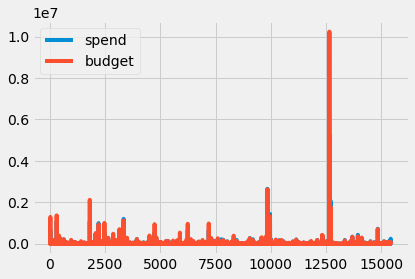

In [7]:
x = pd.DataFrame({'spend':df.campaign_spend,'budget':df.campaign_budget})    
x.plot()   
plt.show() 

#### Describe the data distribution with summary statistics:

In [8]:
df.describe()

,campaign_spend,campaign_budget
count,1.547400e+04,1.547400e+04
mean,4.903037e+03,5.772614e+03
std,6.516692e+04,9.903381e+04
min,3.595000e-01,9.190000e-02
25%,1.517812e+01,1.279290e+01
50%,5.009005e+01,4.881625e+01
75%,2.365468e+02,2.523155e+02
max,5.289217e+06,1.024289e+07


In [9]:
company_group = df.groupby(['treatment','company_size'])
company_group.first()

campaign_spend  campaign_budget
treatment company_size                                 
False     large               411.0601         404.3652
          medium                3.7776           1.9872
          small                10.4477           3.9035
True      large              2001.2332        2913.6709
          medium               34.0315          33.7369
          small                84.6344          82.7636

#### Further analyze data with aggregates:

In [10]:
aggregates = df.groupby(['treatment']).agg(['min','max','count','nunique'])
aggregates

company_size                      campaign_spend                \
                   min    max count nunique            min           max   
treatment                                                                  
False            large  small  7733       3         1.0863  1.200002e+06   
True             large  small  7741       3         0.3595  5.289217e+06   

                        campaign_budget                              
          count nunique             min           max count nunique  
treatment                                                            
False      7733    7716          0.3063  2.119520e+06  7733    7710  
True       7741    7717          0.0919  1.024289e+07  7741    7711

#### Prepare the data by cleaning: filling in, replacing or getting rid of any null/empty values, outliers, transforming any categorical values into their numerical representaions, normalizing indices/values, identifying and selecting key features 

In [11]:
df.isnull().sum()

treatment          0
company_size       0
campaign_spend     0
campaign_budget    0
dtype: int64

### Preparing for Answers:

#### 1. How many campaigns have overspend of greater than 1% of their budget in the control group? In the treatment group?



In [12]:
# positive difference denotes overspending
spending_diffs = (df.campaign_spend - df.campaign_budget)
spending_diffs_percentage = ((df.campaign_spend - df.campaign_budget)/df.campaign_budget) * 100
# spending_diffs
#spending_diffs_percentage

df['spending_diffs'] = spending_diffs
df['spending_diffs_percentage'] = spending_diffs_percentage
df.head()

,treatment,company_size,campaign_spend,campaign_budget,spending_diffs,spending_diffs_percentage
0,False,small,10.4477,3.9035,6.5442,167.649545
1,False,medium,3.7776,1.9872,1.7904,90.096618
2,False,medium,46.1880,55.4523,-9.2643,-16.706791
3,False,small,6.6271,6.5136,0.1135,1.742508
4,False,small,92.3405,83.1018,9.2387,11.117328


In [13]:
df.shape

(15474, 6)

### Plotting the Overspends against Campaign Spend and Campaign Budget

<Figure size 432x288 with 0 Axes>

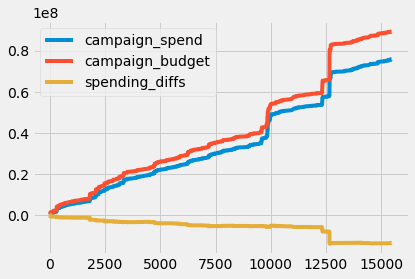

In [53]:
df3 = df[['campaign_spend','campaign_budget','spending_diffs']]
z = df3.cumsum()
plt.figure();
z.plot()

In [68]:
# count overspends on all campaigns having more than 1% of their budget
df01 = df[df['spending_diffs_percentage'] > 1.0]
#df01.head(10)
#overspend_count = df01.shape[0]

# group them by treatment and control groups
df_control_grp = df01[df01['treatment']==False]
df_treatment_grp = df01[df01['treatment']==True]

print("Campaigns having overspends greater than 1% of their budget are as follows: ")
print("Control Group: {} ".format(df_control_grp.shape[0]))
print("Treatment Group: {} ".format(df_treatment_grp.shape[0]))


Campaigns having overspends greater than 1% of their budget are as follows: 
Control Group: 5716 
Treatment Group: 5180 


#### 2. An executive is asking whether or not the new product was effective at reducing overspend, and whether or not it is more or less effective depending on the company size. Give a quick summary of how the treatment affected overspend.

We know from our intial calculations, control_group_count = 7733 and treatment_group_count = 7741.
We can deduce that, (5716/7733) => 73.92% of those using old product saw overspending in control group, as opposed to, 5180/7741 => 66.91% of those using NEW product in treatment group. Therefore, we can say that, there's a slight (7%) reduction in overspend in Group B's favor.

In [69]:
# The average overspend of Group A (Control Group): 
group_A_avg = np.mean(df_control_grp['spending_diffs'])
print ("Group A average overspend = {}".format(round(group_A_avg,4)))

#The average overspend of Group B (Treatment Group): 
group_B_avg = np.mean(df_treatment_grp['spending_diffs'])
print ("Group B average overspend = {}".format(round(group_B_avg,4)))

observed_mean = np.mean(df01.spending_diffs)
print("Overspend population average = {}".format(round(observed_mean,4)))


Group A average overspend = 420.3854
Group B average overspend = 548.4205
Overspend population average = 481.2537


Group A's average overspend is slightly lower than that of overall population average whereas Group B's average is significantly higer than the average. This is counterintuitive to the above finding that even though there are fewer number in Group B, that group's overspend is higer than Group A's. The new product may not be effective at reducing spending.

But these measures by no means are sufficient evidence to conclude that the treatment definitely reduced overspending or otherwise. More tests need to be performed and more statistically significant evidence is needed.

#### 3. A product manager on the team is concerned that certain advertisers in the treatment group are entering lower budgets because they are wary of the new product. Provide some evidence to support his suspicions, or show that any differences in budgets are likely due to random fluctuations.


## Causal Inference & Hypothesis Testing

Let's run some randomized controlled experiments under the null hypothesis in order to determine whether the introduction of the new product is causing certain advertisers in the treatment group to enter lower budgets or the differences in the budgets are purely due to chance.

The hypotheses to test are:

Null Hypothesis(H₀): “the average overspend is the same for both OLD and NEW (A and B) versions of products”

Alternate Hypothesis(H₁): “the average overspend is lower for the NEW product (version B)”

The null hypothesis states that the difference in probabilities between the two groups is zero. Therefore, the mean for this normal distribution will be at zero. The other property we will need for the normal distribution is the standard deviation or the variance, which is the standard deviation squared. Variance in turn is dependent on the probabilities of both the groups. This means that the null hypothesis and alternate hypothesis will have the same variance which will be the sum of the variances for the control group and the treatment group.

### p-value (p) and level of significance(α)

The higher the p-value, the more likely that the null hypothesis holds true, i.e., we cannot reject it.
The level of significance is a threshold that we set in order to decide past what point to reject the null hypothesis. Best practice is, α = 0.05, that is 5% error rate.

We reject the null hypothesis if:
p <= α

We cannot reject the null hypothesis if:
p > α

In [70]:
# run tests using bootstrap sampling using a subset of the original data
# find the p-values to determine 

def boostrap_sample(sample_df):

    statistic = []
    group_A_means = []
    group_B_means = []

    for _ in range (10000):
        bootstrap = sample_df.sample(500, replace=True)
        group_A_mean = bootstrap[bootstrap.treatment == False].spending_diffs.mean()
        group_B_mean = bootstrap[bootstrap.treatment == True].spending_diffs.mean()

        group_A_means.append(group_A_mean)
        group_B_means.append(group_B_mean)
        statistic.append(group_A_mean - group_B_mean)
    
    return statistic, group_A_means, group_B_means


def simulate_under_null(statistic):
    
    sample_mean = np.random.normal(0, np.std(statistic), 10000)
    
    return sample_mean


In [71]:
sample_df = df01.sample(500)
statistic, group_A_means, group_B_means = boostrap_sample(sample_df)
sample_mean = simulate_under_null(statistic)


### Plotting

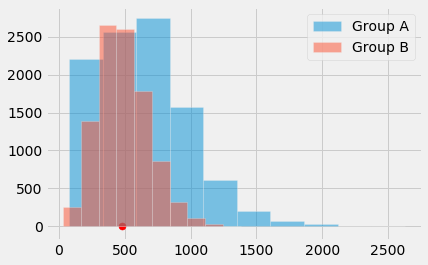

In [72]:
plt.hist(group_A_means, alpha=0.5, label="Group A");
plt.hist(group_B_means, alpha=0.5, label="Group B");
plt.scatter(observed_mean, 0, marker='o', color='red', s=50);

plt.legend()

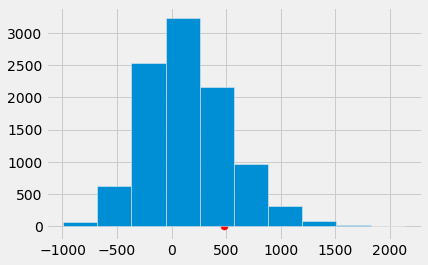

In [73]:
# empirical distribution from sample mean
plt.hist(statistic)
plt.scatter(observed_mean, 0, marker='o', color='red', s=50);
plt.show()

### Caluculating the p-value

In [74]:
p_value = (sample_mean > observed_mean).mean()
p_value

0.1082

In [75]:
alpha = 0.05
if p_value <= alpha:
    reject_null = True  
else:
    reject_null = False

print ("Reject Null Hypothesis? ", reject_null)

Reject Null Hypothesis?  False


The p_value of around 0.30 is significantly higher than the alpha value of 0.05 and well beyond the 5% error rate cutoff. Therefore, we conclude that we cannot reject the null hypothesis. 

Conclusion: The average overspend is the same for both OLD and NEW (A and B) versions of products. We cannot establish any strong correlation or association between treatment and overspending to confidently say that the treatment caused reduction in overspending.